In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline


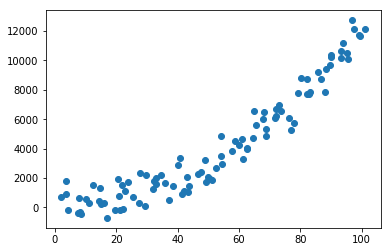

In [2]:
# 构建服从多项式回归特性的数据集
np.random.seed(37) # 使得每次运行得到的随机数都一样
x=np.arange(2,102) 
x_shift=np.random.normal(size=x.shape)
x=x+x_shift # 构建的x含有100个数，通过在整数点引入偏差得到

error=np.random.normal(size=x.shape)*800 # 构建噪音，*800是扩大噪音的影响
y=1.19*x*x+0.82*x+5.95+error
plt.scatter(x,y) # 可以查看生成的数据集的分布情况

dataset=[(i,j) for i,j in zip(x,y)]
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataset,test_size=0.2,random_state=37)
X_train=np.array([i for (i,j) in train_set]).reshape(-1,1) # 后面的fit需要先reshape
y_train=np.array([j for (i,j) in train_set]).reshape(-1,1)
X_test= np.array([i for (i,j) in test_set]).reshape(-1,1)
y_test= np.array([j for (i,j) in test_set]).reshape(-1,1)

简单线性回归器模型的评测结果----->>>
均方误差MSE：1906916.26
解释方差分：0.85
简单线性回归器得到的直线方程为：y=117.061x+-1924.904


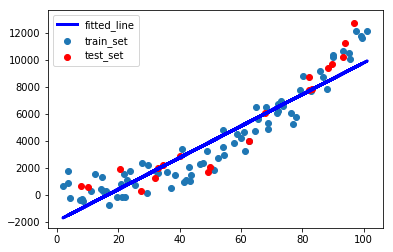

In [3]:
# 如果采用简单线性回归器进行拟合得到简单的拟合直线
from sklearn import linear_model
linear_regressor=linear_model.LinearRegression() # 创建线性回归器对象
linear_regressor.fit(X_train,y_train) # 使用训练数据集训练该回归器对象

# 查看拟合结果
y_predict=linear_regressor.predict(X_train) # 使用训练后的回归器对象来拟合训练数据
plt.figure()
plt.scatter(X_train,y_train,label='train_set')
plt.scatter(X_test,y_test,color='r',label='test_set')
plt.plot(X_train,y_predict,'-b',linewidth=3,label='fitted_line')
plt.legend()

# 用测试集看看该线性回归器模型的测试结果
y_predict_test=linear_regressor.predict(X_test)
import sklearn.metrics as metrics
print('简单线性回归器模型的评测结果----->>>')
print('均方误差MSE：{}'.format(
    round(metrics.mean_squared_error(y_predict_test,y_test),2)))
print('解释方差分：{}'.format(
    round(metrics.explained_variance_score(y_predict_test,y_test),2)))
print('简单线性回归器得到的直线方程为：y={:.3f}x+{:.3f}'
      .format(linear_regressor.coef_[0][0],linear_regressor.intercept_[0]))

多项式回归器模型的评测结果----->>>
均方误差MSE：525885.05
解释方差分：0.97
得到的多项式方程为：y=1.374x^2+(-22.187x)+487.664


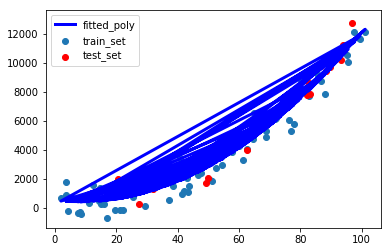

In [4]:
# 使用多项式回归器来对数据集进行拟合，得到多项式方程
from sklearn.preprocessing import PolynomialFeatures
polynomial=PolynomialFeatures(degree=2) # 构建多项式回归器对象
# degree是多项式的次数，此处初步的设置为2

X_train_transformed=polynomial.fit_transform(X_train)
# print(X_train_transformed) #transformed之后的数据是degree+1维
from sklearn import linear_model
poly_regressor=linear_model.LinearRegression() # 也是构建线性回归器
poly_regressor.fit(X_train_transformed,y_train) # 对多项式回归器进行训练

# 查看拟合结果
y_predict_polynomial=poly_regressor.predict(X_train_transformed) 
plt.figure()
plt.scatter(X_train,y_train,label='train_set')
plt.scatter(X_test,y_test,color='r',label='test_set')

# print(y_predict_polynomial.shape) #(80, 1)
plt.plot(X_train,y_predict_polynomial,'-b',linewidth=3,label='fitted_poly') 
# 上面的plot会产生很多条线。。。。。
plt.legend()

# 用测试集看看该线性回归器模型的测试结果
X_test_transformed=polynomial.fit_transform(X_test)
y_predict_test=poly_regressor.predict(X_test_transformed)
import sklearn.metrics as metrics
print('多项式回归器模型的评测结果----->>>')
print('均方误差MSE：{}'.format(
    round(metrics.mean_squared_error(y_predict_test,y_test),2)))
print('解释方差分：{}'.format(
    round(metrics.explained_variance_score(y_predict_test,y_test),2)))
print('得到的多项式方程为：y={:.3f}x^2+({:.3f}x)+{:.3f}'
      .format(poly_regressor.coef_[0][-1],
              poly_regressor.coef_[0][-2],
              poly_regressor.intercept_[0]))

In [5]:
# 使用多项式回归器预测新的数据值
data_X=[[66]] # 需要计算的数据点 X值
print('用直线回归器得到的数值：{}'.format(linear_regressor.predict(data_X)))
print('用拟合直线计算的数值：{}'.format(
    linear_regressor.coef_[0][0]*data_X[0][0]+linear_regressor.intercept_[0]))

data_X_transormed=polynomial.fit_transform(data_X)
data_X_predict=poly_regressor.predict(data_X_transormed)
# print(poly_regressor.coef_, '\n',poly_regressor.intercept_)
print('用多项式回归器得到的数值：{}'.format(data_X_predict))
print('用多项式曲线计算的数值：{}'.format(
    poly_regressor.coef_[0][-1]*np.power(data_X[0][0],2)+
    poly_regressor.coef_[0][-2]*data_X[0][0]+
    poly_regressor.intercept_[0]))
# 两者数据相等，代表predict的确是按照这个曲线方程来计算的。

用直线回归器得到的数值：[[5801.09012059]]
用拟合直线计算的数值：5801.090120592645
用多项式回归器得到的数值：[[5010.58753529]]
用多项式曲线计算的数值：5010.587535291616
